# Neural nets

Neural nets are models that try to simulate the human brain behaviour. They were inspirated by biology.

## Perceptron

It is the simplest neural network, it is a single artificial neuron.
It can be seen in image below:

<img align="left" src="perceptron.jpeg" /> 

Perceptron can solve linear problems.

In [1]:
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import fetch_mldata
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split

In [3]:
perceptron = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 2),     # 2 input pixels per batch
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=1,        # 1 target values [0, 1]

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,   # flag to indicate we're dealing with regression problem
    max_epochs=400,    # we want to train this many epochs
    verbose=1,
    )

In [4]:
print perceptron

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10db5fc50>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10db5fbd0>,
     custom_score=None, input_shape=(None, 2),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<function objective at 0x10db685f0>,
     objective_loss_function=<function squared_error at 0x10d957488>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x10db60fc8>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x10db60e60>],
     output_nonlinearity=None, output_num_units=1, regression=True,
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x10db5fc90>,
     update=<function nesterov_momentum at 0x10d957b18>,
     update_learning_ra

In [5]:
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

In [6]:
perceptron.fit(X1.astype(np.float32), Y1.astype(np.uint16))

# Neural Network with 3 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input        2
  1  output       1

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.64538       0.98190      0.65727  0.00s
      2       0.60472       0.89636      0.67464  0.00s
      3       0.55086       0.79777      0.69050  0.00s
      4       0.48888       0.69351      0.70493  0.00s
      5       0.42352       0.58998      0.71786  0.00s
      6       0.35890       0.49223      0.72914  0.00s
      7       0.29830       0.40392      0.73851  0.00s
      8       0.24409       0.32731      0.74574  0.00s
      9       0.19774       0.26343      0.75066  0.00s
     10       0.15994       0.21227      0.75351  0.00s
     11       0.13068       0.17303      0.75521  0.00s
     12       0.10939       0.14438      0.75765  0.00s
     13       0.09517       0.12467      0.76338  0.00s
     14      

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10db5fc50>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10db5fbd0>,
     custom_score=None, input_shape=(None, 2),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<function objective at 0x10db685f0>,
     objective_loss_function=<function squared_error at 0x10d957488>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x10db60fc8>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x10db60e60>],
     output_nonlinearity=None, output_num_units=1, regression=True,
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x10db5fc90>,
     update=<function nesterov_momentum at 0x10d957b18>,
     update_learning_ra

Predict new data using our neural net just trained

It is important to notice lasagne outputs a different format from our labels

In [7]:
y_pred = perceptron.predict(X1.astype(np.float32))
print np.all(y_pred == Y1)

False


In [8]:
for n, pred in enumerate(y_pred):
    print u'Neural net prediction {}, expected {}, comparison {}.'.format(pred, Y1[n], np.abs(np.round(pred)) == Y1[n])

Neural net prediction [ 0.22328402], expected 0, comparison [ True].
Neural net prediction [ 0.27104537], expected 0, comparison [ True].
Neural net prediction [ 0.98894346], expected 1, comparison [ True].
Neural net prediction [ 0.71032203], expected 1, comparison [ True].
Neural net prediction [ 0.90699045], expected 1, comparison [ True].
Neural net prediction [ 0.99886528], expected 1, comparison [ True].
Neural net prediction [-0.02732628], expected 0, comparison [ True].
Neural net prediction [-0.06620366], expected 0, comparison [ True].
Neural net prediction [ 1.06978678], expected 1, comparison [ True].
Neural net prediction [ 0.51151886], expected 0, comparison [False].
Neural net prediction [ 0.78449019], expected 0, comparison [False].
Neural net prediction [ 0.09730235], expected 0, comparison [ True].
Neural net prediction [-0.08805078], expected 0, comparison [ True].
Neural net prediction [ 0.94980892], expected 1, comparison [ True].
Neural net prediction [ 1.00060696

/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


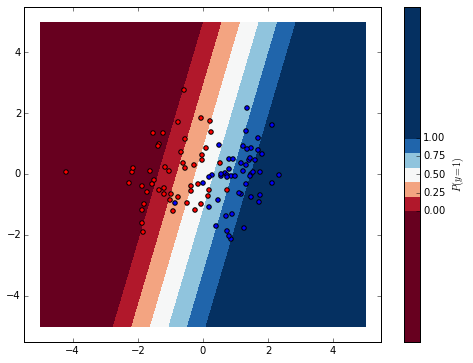

In [12]:
class0 = np.where(Y1==0)[0]
class1 = np.where(Y1==1)[0]

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = perceptron.predict_proba(grid.astype(np.float32)).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X1[class0, 0], X1[class0, 1], c='r')
ax.scatter(X1[class1, 0], X1[class1, 1], c='b')
plt.show()

### Considerations

Learnable parameters 3:

1. Weight input X1
1. Weight input X2
1. Weight input bias


Additionaly we have the following:

- Epoch is a forward/backward pass for the whole dataset
- Batch is a subset of the whole dataset
- Iteration is forward/backward pass for each batch

E.g.

Dataset size: 2000

Batch size: 1000

2 Iterations will be 1 epoch 

In [9]:
import os
import gzip
import pickle
from urllib import urlretrieve

def pickle_load(f, encoding):
    return pickle.load(f)

In [10]:
DATA_URL = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
DATA_FILENAME = 'mnist.pkl.gz'

def _load_data(url=DATA_URL, filename=DATA_FILENAME):
    """Load data from `url` and store the result in `filename`."""
    if not os.path.exists(filename):
        print("Downloading MNIST dataset")
        urlretrieve(url, filename)

    with gzip.open(filename, 'rb') as f:
        return pickle_load(f, encoding='latin-1')

In [11]:
def load_data():
    """Get data with labels, split into training, validation and test set."""
    data = _load_data()
    X_train, y_train = data[0]
    X_valid, y_valid = data[1]
    X_test, y_test = data[2]
    y_train = np.asarray(y_train, dtype=np.int32)
    y_valid = np.asarray(y_valid, dtype=np.int32)
    y_test = np.asarray(y_test, dtype=np.int32)

    return dict(
        X_train=X_train,
        y_train=y_train,
        X_valid=X_valid,
        y_valid=y_valid,
        X_test=X_test,
        y_test=y_test,
        num_examples_train=X_train.shape[0],
        num_examples_valid=X_valid.shape[0],
        num_examples_test=X_test.shape[0],
        input_dim=X_train.shape[1],
        output_dim=10,
    )

In [12]:
data = load_data()

In [13]:
net1 = NeuralNet(
        layers=[('input',  layers.InputLayer),
                ('hidden', layers.DenseLayer),
                ('output', layers.DenseLayer),
                ],
        # layer parameters:
        input_shape=(None, 28*28),
        hidden_num_units=100,           # number of units in 'hidden' layer
        output_nonlinearity=lasagne.nonlinearities.softmax,
        output_num_units=10,            # 10 target values for the digits 0, 1, 2, ..., 9

        # optimization method:
        update=nesterov_momentum,
        update_learning_rate=0.01,
        update_momentum=0.9,

        max_epochs=10,
        verbose=1,
        )

class 5


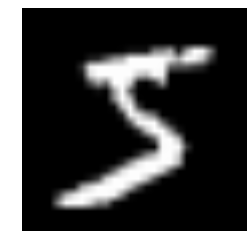

In [14]:
plt.axis('off')
plt.imshow(data['X_train'][0, :].reshape(28, 28), cmap='gray')
print 'class', data['y_train'][0]

In [15]:
net1.fit(data['X_train'], data['y_train'])

# Neural Network with 79510 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input      784
  1  hidden     100
  2  output      10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.60666       0.32692      1.85569      0.90998  1.09s
      2       0.31033       0.26710      1.16185      0.92641  1.07s
      3       0.25883       0.23292      1.11123      0.93304  0.77s
      4       0.22415       0.20856      1.07476      0.93957  0.70s
      5       0.19792       0.19034      1.03983      0.94540  0.71s
      6       0.17726       0.17635      1.00517      0.94876  0.70s
      7       0.16059       0.16546      0.97057      0.95272  0.70s
      8       0.14684       0.15641      0.93882      0.95420  0.71s
      9       0.13527       0.14907      0.90744      0.95588  0.70s
     10       0.12543       0.14305      0.87685      0.95737  0.71s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x119b420d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x119b42050>,
     custom_score=None, hidden_num_units=100, input_shape=(None, 784),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=10, more_params={},
     objective=<function objective at 0x119b41488>,
     objective_loss_function=<function categorical_crossentropy at 0x119935050>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x11b3b5878>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x11b3b56c8>],
     output_nonlinearity=<function softmax at 0x1198420c8>,
     output_num_units=10, regression=False,
     train_split=<nolearn.las

Label: 4
Predicted: [4]


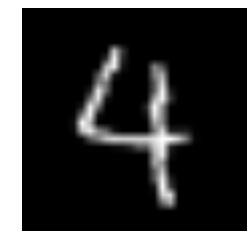

In [26]:
idx = 24

print("Label: %s" % str(data['y_test'][idx]))
print("Predicted: %s" % str(net1.predict([data['X_test'][idx]])))

plt.axis('off')
plt.imshow(data['X_test'][idx].reshape(28, 28), cmap='gray')

In [17]:
%time y_pred = net1.predict(data['X_test'])

CPU times: user 66.5 ms, sys: 5.77 ms, total: 72.3 ms
Wall time: 71.8 ms


In [18]:
print 'quantity of images on {}'.format(len(y_pred))

quantity of images on 10000


In [19]:
correct = 0
for n, pred in enumerate(y_pred):
    if str(pred) == str(data['y_test'][n]):
        correct = correct + 1    

In [20]:
print 'Corrected {}, {:.2f}%'.format(correct, 100 * float(correct)/len(data['y_test']))

Corrected 9622, 96.22%
